# Helping Yulu Make Better Business Decisions :

    WHAT IS YULU BIKES : 
    
    Yulu is a technology-driven mobility platform that enables Integrated Urban Mobility across public and private modes of transport. Using Micro Mobility Vehicles (MMVs) through a user-friendly mobile app, Yulu enables first and last-mile connectivity that is seamless, shared and sustainable.

    - What are the conditions where the probability is highest for Yulu Bikes demand?
    
    - What time of the day can Yulu Bikes experiment with surge pricing?
    
    - Does seasonality play a role in the demand?
    
    - How to increase the number of registered customers?
    
    - Is the demand effected by the fact that the day is a holiday or a working day?
    
    - What role does weather play on Yulu Bikes demand?
    
    - Do we see any trend in the demand for Yulu Bikes? How can we leverage it?
    

## Yulu Dataset

#### This Yulu dataset available on Kaggle

    - Datetime   : Datetime
    - season     : 1 = spring, 2 = summer, 3 = fall, 4 = winter
    - holiday    : Whether day is a holiday (1) or not holiday (0)
    - workingday : If day is neither weekend nor holiday,it is 1, otherwise is 0.
    - weather    :
                    1: Clear, Few clouds, partly cloudy, partly cloudy
                    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                    3: Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp       : Temperature in Celsius
    - atemp      : Feeling temperature in Celsius
    - humidity   : Humidity
    - windspeed  : Wind speed
    - casual     : Count of casual users
    - registered : Count of registered users
    - count      : Count of total rental bikes including both casual and registered

### Contents in the Notebook :


#### (1)   Data Preprocessing

#### (2)   Multivariate Data Analysis

#### (3)   Analyzing Weather and Season for customer count

#### (4)   Analyzing Weather and Season and Working days 

#### (5)   Monthly analysis & analysis during the day 

#### (6)   Quarterly and Yearly Trends 

#### (7)   Effect of Temperature, Windspeed and Humidity over the customer demand 

#### (8)   Registered customers vs Casual Customers 

#### (9)   SOME BUSINESS RECOMMENDATIONS TO THE LEADERSHIP


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
yu = pd.read_csv('Yulu.csv', engine='python', index_col = 0)
yu = yu.reset_index()

In [5]:
yu.shape

(10886, 12)

In [6]:
yu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Preprocessing :

In [7]:
yu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
yu['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [9]:
# the datetime column is string right now

type(yu['datetime'][0])

str

In [10]:
# Calculating the Inter Quartile Range for the dataset

Qmin = yu['count'].describe()[3]
Q1 = yu['count'].describe()[4]
Q3 = yu['count'].describe()[6]
Qmax = yu['count'].describe()[7]
IQR = Q3 - Q1

Qmin,Q1,Q3,Qmax, IQR

(1.0, 42.0, 284.0, 977.0, 242.0)

In [15]:
upp_limit = Q3 + (1.5*IQR)
upp_limit

647.0

In [489]:
yu['temp'].mean()

20.231965089572746

In [11]:
def weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Cloudy'
    elif x == 3:
        return 'LightRains'
    elif x == 4:
        return 'Thunderstorm'
    
def season(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    elif x == 4:
        return 'Winter'
    
def dayperiod(x):
    if x.hour in (4,5,6,7):
        return 'EarlyMorning'
    elif x.hour in (8,9,10,11):
        return 'Morning'
    elif x.hour in (12,13,14,15,16):
        return 'Afternoon'
    elif x.hour in (17,18,19):
        return 'Evening'
    elif x.hour in (20,21,22,23):
        return 'Night'
    elif x.hour in (0,1,2,3):
        return 'LateNight'

In [16]:
def traffic(x):
    if x >= upp_limit:
        return 'High'
    else:
        return 'Normal'
    
def month(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'
    

In [17]:
# converting datetime column to datetime type
yu['datetime'] = pd.to_datetime(yu['datetime'])
yu['date'] = yu['datetime'].dt.date
yu['time'] = yu['datetime'].dt.time


#extracting month, day and year details from the data
yu['day'] = yu['date'].apply(lambda x:x.day)
yu['month'] = yu['date'].apply(lambda x:x.month)
yu['year'] = yu['date'].apply(lambda x:x.year)


# preprocessing values in the data for better analysis
yu['month'] = yu['month'].apply(month)
yu['dayperiod'] = yu['time'].apply(dayperiod)
yu['weatherDesc'] = yu['weather'].apply(weather)
yu['seasonDesc'] = yu['season'].apply(season)
yu['holidayDesc'] = yu['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Not Holiday')
yu['workingdayDesc'] = yu['workingday'].apply(lambda x: 'Working' if x == 1 else 'Not Working')


# casual and registeretd customer ratio
yu['casual%'] = yu['casual']*100/yu['count']
yu['registered%'] = yu['registered']*100/yu['count']

yu['casual%'] = yu['casual%'].round(2)
yu['registered%'] = yu['registered%'].round(2)


# adding traffic column for better analysis
yu['traffic'] = yu['count'].apply(traffic)   


# removing record with weather = Thunderstorm as it is the only 1 record in the data and is insignificant
yu = yu[yu['weatherDesc'] != 'Thunderstorm']

In [18]:
yu.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,year,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,casual%,registered%,traffic
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,Jan,2011,LateNight,Clear,Spring,Not Holiday,Not Working,18.75,81.25,Normal
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,Jan,2011,LateNight,Clear,Spring,Not Holiday,Not Working,20.00,80.00,Normal
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,Jan,2011,LateNight,Clear,Spring,Not Holiday,Not Working,15.62,84.38,Normal


In [19]:
yu = yu[['date','time','year','month','day','dayperiod','weatherDesc','seasonDesc','holidayDesc','workingdayDesc','weather','temp','atemp','windspeed','humidity','casual','registered','count','casual%','registered%','traffic']]

    - No of years of data : Almost 2 years

In [20]:
round(((max(yu['date']) - min(yu['date'])).days)/365,2)

1.97

In [21]:
yu['seasonDesc'].value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2685
Name: seasonDesc, dtype: int64

In [22]:
yu['weatherDesc'].value_counts()

Clear         7192
Cloudy        2834
LightRains     859
Name: weatherDesc, dtype: int64

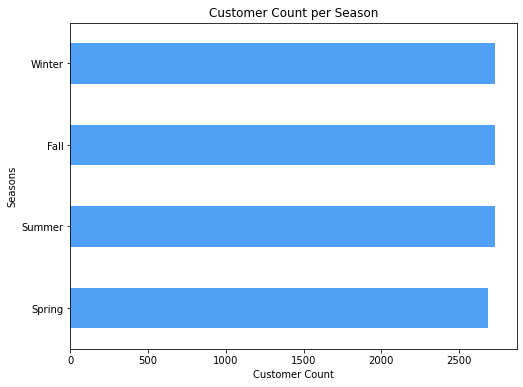

In [392]:
fig = plt.figure(figsize =(8, 6))
yu['seasonDesc'].value_counts().sort_values().plot(kind = 'barh', color = '#51A0F8')

plt.xlabel("Customer Count")
plt.ylabel("Seasons")
plt.title("Customer Count per Season")
plt.savefig('ccps.png',transparent=True)
plt.show()

    - The data for seasons is equal for all the seasons, it is a good sample data for data analysis.

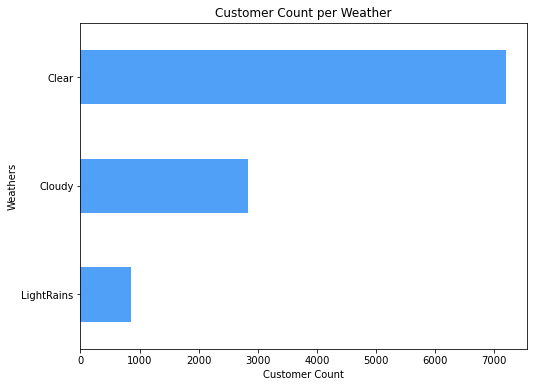

In [394]:
fig = plt.figure(figsize =(8, 6))
yu['weatherDesc'].value_counts().sort_values().plot(kind = 'barh',color = '#51A0F8')

plt.xlabel("Customer Count")
plt.ylabel("Weathers")
plt.title("Customer Count per Weather")
plt.savefig('ccpw.png',transparent=True)
plt.show()

    - As expected, there are 2.5 times the records for clear weather as cloudy data, and around 8 times the records for     clear weather as Light Rains records.

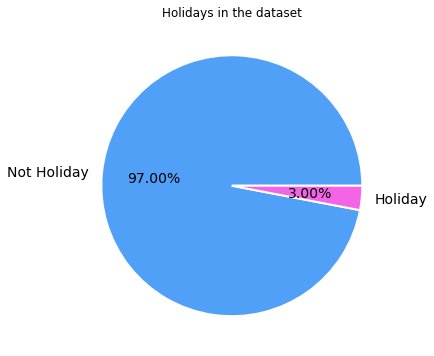

In [395]:
fig = plt.figure(figsize =(8, 6))
colors2 = [ '#51A0F8', '#F365E6']
plt.pie((yu['holidayDesc'].value_counts()*100/len(yu)).round(),labels=['Not Holiday','Holiday'],autopct='%.02f%%',textprops={'fontsize': 14},wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors = colors2)
plt.title("Holidays in the dataset")
plt.savefig('hol.png',transparent=True)
plt.show()

    - Only 3% records in the dataset have Holiday data.

In [28]:
yu['traffic'].value_counts()

Normal    10582
High        303
Name: traffic, dtype: int64

C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


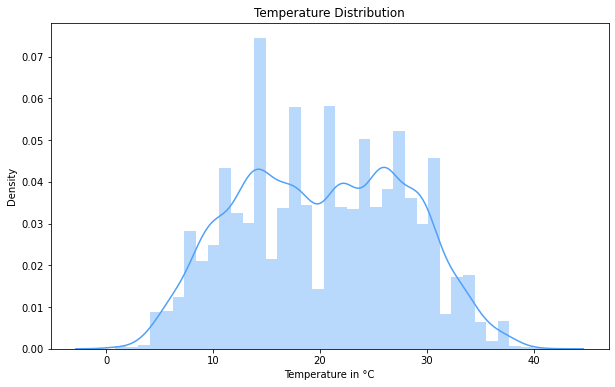

In [488]:
fig = plt.figure(figsize =(10, 6))
sns.distplot(yu["temp"], kde = True, color = '#51A0F8')

plt.xlabel("Temperature in °C")
plt.ylabel("Density")
plt.title("Temperature Distribution")
plt.savefig('temp_dist.png',transparent=True)
plt.show()

C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


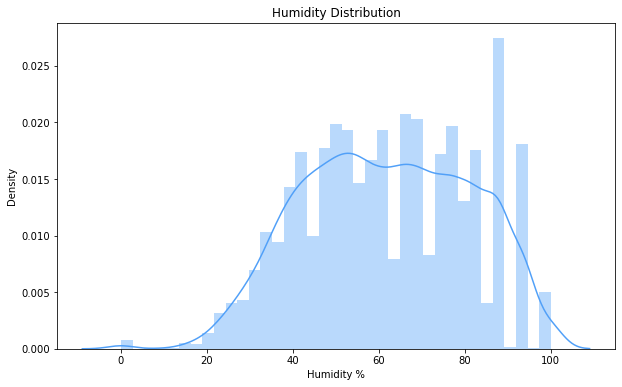

In [487]:
fig = plt.figure(figsize =(10, 6))
sns.distplot(yu["humidity"], kde = True, color = '#51A0F8')

plt.xlabel("Humidity %")
plt.ylabel("Density")
plt.title("Humidity Distribution")
plt.savefig('hum_dist.png',transparent=True)
plt.show()

C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


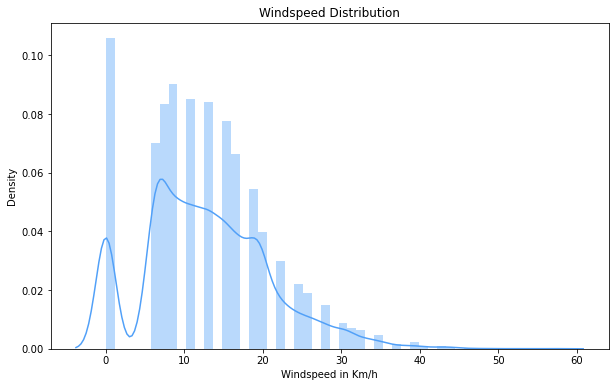

In [486]:
fig = plt.figure(figsize =(10, 6))
sns.distplot(yu["windspeed"], kde = True, color = '#51A0F8')

plt.xlabel("Windspeed in Km/h")
plt.ylabel("Density")
plt.title("Windspeed Distribution")
plt.savefig('wind_dist.png',transparent=True)
plt.show()

## Multivariate Data Analysis :

In [29]:
yu.head(3)

,date,time,year,month,day,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,...,temp,atemp,windspeed,humidity,casual,registered,count,casual%,registered%,traffic
0,2011-01-01,00:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.84,14.395,0.0,81,3,13,16,18.75,81.25,Normal
1,2011-01-01,01:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,8,32,40,20.00,80.00,Normal
2,2011-01-01,02:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,5,27,32,15.62,84.38,Normal


In [36]:
meanCount =round( yu['count'].mean(),2)
meanCount

191.58

In [38]:
yu['count'].describe()

count    10885.000000
mean       191.576665
std        181.152582
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [39]:
yu_high_demand = yu[yu['traffic'] == 'High']
yu_no_outlier = yu[yu['traffic'] == 'Normal']

### Analyzing Weather and Season for traffic :

In [40]:
yu.groupby(['seasonDesc'])['count'].mean()

seasonDesc
Fall      234.417124
Spring    116.325512
Summer    215.251372
Winter    198.988296
Name: count, dtype: float64

In [41]:
yu.groupby(['weatherDesc'])['count'].mean()

weatherDesc
Clear         205.236791
Cloudy        178.955540
LightRains    118.846333
Name: count, dtype: float64

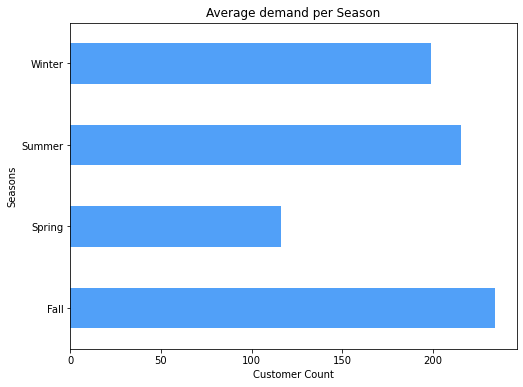

In [485]:
fig = plt.figure(figsize =(8, 6))
yu.groupby(['seasonDesc'])['count'].mean().plot(kind = 'barh',color = '#51A0F8')

plt.xlabel("Customer Count")
plt.ylabel("Seasons")
plt.title("Average demand per Season")
plt.savefig('adps.png',transparent=True)
plt.show()

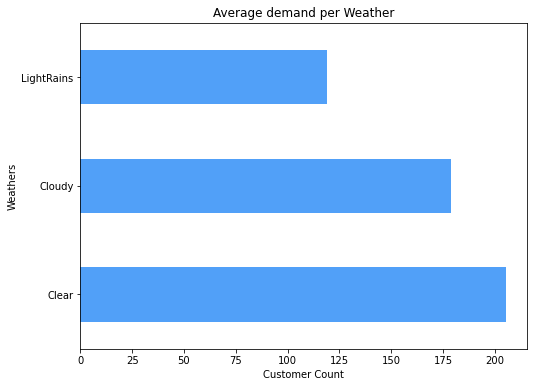

In [401]:
fig = plt.figure(figsize =(8, 6))
yu.groupby(['weatherDesc'])['count'].mean().plot(kind = 'barh',color = '#51A0F8')

plt.xlabel("Customer Count")
plt.ylabel("Weathers")
plt.title("Average demand per Weather")
plt.savefig('adpw.png',transparent=True)
plt.show()

In [61]:
SWC = yu.groupby(['seasonDesc','weatherDesc'])['count'].mean().reset_index()
SWC = SWC.rename(columns = {'count':'avg_traffic'})
SWC = SWC.sort_values(by = 'avg_traffic', ascending = False).round(2)
SWC['Season_Weather'] = SWC['seasonDesc'] + ' & ' + SWC['weatherDesc']
SWC

,seasonDesc,weatherDesc,avg_traffic,Season_Weather
0,Fall,Clear,243.58,Fall & Clear
6,Summer,Clear,236.73,Summer & Clear
1,Fall,Cloudy,230.77,Fall & Cloudy
9,Winter,Clear,209.51,Winter & Clear
10,Winter,Cloudy,194.78,Winter & Cloudy
7,Summer,Cloudy,189.52,Summer & Cloudy
2,Fall,LightRains,156.58,Fall & LightRains
11,Winter,LightRains,134.47,Winter & LightRains
3,Spring,Clear,126.78,Spring & Clear
8,Summer,LightRains,123.91,Summer & LightRains


C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


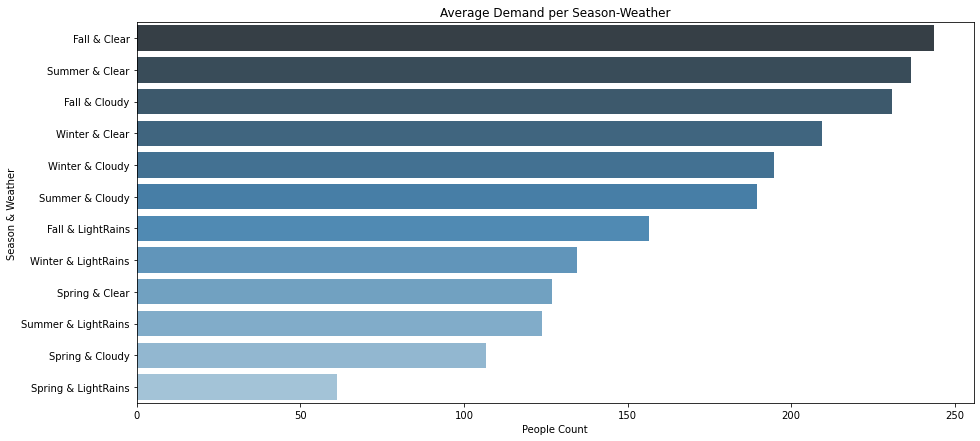

In [402]:
plt.figure(figsize = (15,7))

y = SWC['Season_Weather'].tolist()
x = SWC['avg_traffic'].tolist()

#y = SWC['Season_Weather'].tolist()[::-1]
#x = SWC['avg_traffic'].tolist()[::-1]

paletteBlue = sns.color_palette("Blues_d", n_colors = len(x))
paletteBlue.reverse()

sns.barplot(x, y, palette=paletteBlue)

plt.ylabel("Season & Weather")
plt.xlabel("People Count")
plt.title("Average Demand per Season-Weather")
plt.savefig('adps_w.png',transparent=True)
plt.show()

    - Majority Yulu customers prefer a clear weather on almost all the seasons except spring.

    - The second most preferred weather is cloudy, followed by light rains.

    - A clear or cloudy weather in either Fall or Winter attracts the highest number of  customers at Yulu.


In [62]:
SW = pd.crosstab(yu['seasonDesc'],yu['weatherDesc']).reset_index()
seasonlist = SW.columns.tolist()
seasonlist.remove('seasonDesc')
SW = pd.melt(SW, id_vars =['seasonDesc'], value_vars = seasonlist)
SW = SW.rename(columns = {'value':'days'})
SW

,seasonDesc,weatherDesc,days
0,Fall,Clear,1930
1,Spring,Clear,1759
2,Summer,Clear,1801
3,Winter,Clear,1702
4,Fall,Cloudy,604
5,Spring,Cloudy,715
6,Summer,Cloudy,708
7,Winter,Cloudy,807
8,Fall,LightRains,199
9,Spring,LightRains,211


In [70]:
avgPr = pd.merge(SWC,SW, on = ['seasonDesc','weatherDesc'], how = 'inner')
avgPr['prob'] = avgPr['avg_traffic']/avgPr['days']
avgPr = avgPr.sort_values(by = 'prob', ascending = False).round(2)[['Season_Weather','avg_traffic','days','prob']]
avgPr

,Season_Weather,avg_traffic,days,prob
6,Fall & LightRains,156.58,199,0.79
7,Winter & LightRains,134.47,225,0.60
9,Summer & LightRains,123.91,224,0.55
2,Fall & Cloudy,230.77,604,0.38
11,Spring & LightRains,61.23,211,0.29
5,Summer & Cloudy,189.52,708,0.27
4,Winter & Cloudy,194.78,807,0.24
10,Spring & Cloudy,106.86,715,0.15
1,Summer & Clear,236.73,1801,0.13
0,Fall & Clear,243.58,1930,0.13


C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


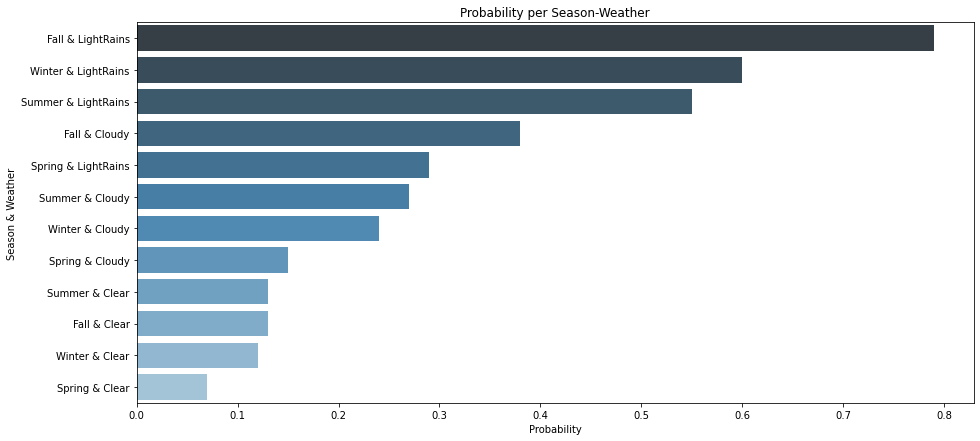

In [403]:
plt.figure(figsize = (15,7))

y = avgPr['Season_Weather'].tolist()
x = avgPr['prob'].tolist()

#y = SWC['Season_Weather'].tolist()[::-1]
#x = SWC['avg_traffic'].tolist()[::-1]

paletteBlue = sns.color_palette("Blues_d", n_colors = len(x))
paletteBlue.reverse()

sns.barplot(x, y, palette=paletteBlue)

plt.ylabel("Season & Weather")
plt.xlabel("Probability")
plt.title("Probability per Season-Weather")
plt.savefig('prob_sw.png',transparent=True)
plt.show()

    - Although the customer count during light rains is less, we find that there is the highest probability of a customer to ride a Yulu bike during light rains with 80% !!

    - In fact, light rains make the customers use Yulu in almost every season.

    - Second most probable condition is a cloudy day during the Fall.

### Analyzing Weather and Season with Working days :

In [132]:
WW = yu.groupby(['weatherDesc','workingdayDesc'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
WW

,weatherDesc,workingdayDesc,count
1,Clear,Working,206.16
0,Clear,Not Working,203.35
3,Cloudy,Working,184.71
2,Cloudy,Not Working,166.53
4,LightRains,Not Working,120.63
5,LightRains,Working,118.22


In [136]:
WW.groupby(['workingdayDesc'])['count'].mean().round()

workingdayDesc
Not Working    164.0
Working        170.0
Name: count, dtype: float64

    - We do not see any significant difference of working/non working days for any weather as such. Clear skies are most preferred by the customers.
    
    - However, looking at each season, we find that during cloudy weather, demand decreases by 10% on a non working day.

In [134]:
WC = yu.groupby(['seasonDesc','workingdayDesc'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
WC

,seasonDesc,workingdayDesc,count
1,Fall,Working,235.33
0,Fall,Not Working,232.52
4,Summer,Not Working,222.69
5,Summer,Working,211.95
7,Winter,Working,202.28
6,Winter,Not Working,192.14
3,Spring,Working,121.30
2,Spring,Not Working,105.73


In [137]:
WC.groupby(['workingdayDesc'])['count'].mean().round()

workingdayDesc
Not Working    188.0
Working        193.0
Name: count, dtype: float64

    - We do not see any significant difference of working/non working days for any season as such. Fall and Summer are most preferred seasons by the customers.
    
    - However, looking at each season, we find that during the summers, traffic increases by around 5% on a non working day, which is an opposite trend, considering the fact that traffic should actually decrease durign non working days.
    
    

### Months & Day Time analysis :

In [140]:
TZ = pd.DataFrame({'dayperiod':['EarlyMorning','Morning','Afternoon','Evening','Night','LateNight'],
                  'Timings':['4:00 am-7:59 am','8:00 am-11:59 am','12:00 pm-4:59 pm','5:00 pm-7:59 pm','8:00 pm-11:59 pm','12:00 am-3:59 am']})

In [141]:
TZ

,dayperiod,Timings
0,EarlyMorning,4:00 am-7:59 am
1,Morning,8:00 am-11:59 am
2,Afternoon,12:00 pm-4:59 pm
3,Evening,5:00 pm-7:59 pm
4,Night,8:00 pm-11:59 pm
5,LateNight,12:00 am-3:59 am


In [143]:
yu.head(3)

,date,time,year,month,day,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,...,temp,atemp,windspeed,humidity,casual,registered,count,casual%,registered%,traffic
0,2011-01-01,00:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.84,14.395,0.0,81,3,13,16,18.75,81.25,Normal
1,2011-01-01,01:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,8,32,40,20.00,80.00,Normal
2,2011-01-01,02:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,5,27,32,15.62,84.38,Normal


In [120]:
MC = yu.groupby(['seasonDesc','month'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
MC['surge_traffic%'] = MC['count'].apply(lambda x:round((x - yu['count'].mean())*100/yu['count'].mean(),2))
MC

,seasonDesc,month,count,surge_traffic%
7,Summer,Jun,242.03,26.34
1,Fall,Jul,235.33,22.84
0,Fall,Aug,234.12,22.21
2,Fall,Sep,233.81,22.05
11,Winter,Oct,227.70,18.86
8,Summer,May,219.46,14.55
10,Winter,Nov,193.68,1.10
6,Summer,Apr,184.16,-3.87
9,Winter,Dec,175.61,-8.33
5,Spring,Mar,148.17,-22.66


C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


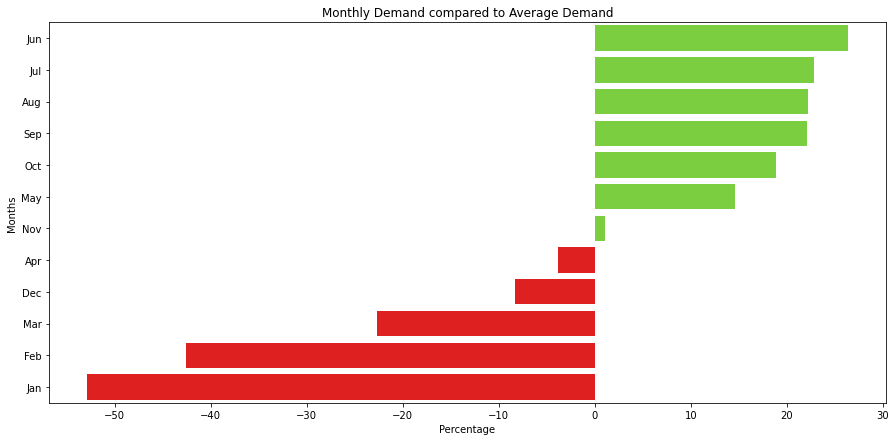

In [404]:
plt.figure(figsize = (15,7))



y = MC['month'].tolist()
x = MC['surge_traffic%'].tolist()

#y = SWC['Season_Weather'].tolist()[::-1]
#x = SWC['avg_traffic'].tolist()[::-1]

colorPalette = []
for i in x:
    if i > 0:
        colorPalette.append('#76E628')
    else:
        colorPalette.append('r')

        
sns.barplot(x, y, palette=colorPalette)

plt.ylabel("Months")
plt.xlabel("Percentage")
plt.title("Monthly Demand compared to Average Demand")
plt.savefig('MDAD.png',transparent=True)
plt.show()

    - Months from May to Oct see the above average demand in the customer count than the average demand, peaking at June with 26%
    
    - Jan, Feb and Mar sees the highest dip in customer demand on the same parameter, with demand dropping more than 50% in Jan.

In [121]:
DC = yu.groupby(['dayperiod'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
DC['surge_traffic%'] = DC['count'].apply(lambda x:round((x - yu['count'].mean())*100/yu['count'].mean(),2))
DC

,dayperiod,count,surge_traffic%
2,Evening,405.14,111.48
0,Afternoon,265.68,38.68
4,Morning,242.58,26.62
5,Night,156.24,-18.45
1,EarlyMorning,79.51,-58.50
3,LateNight,31.18,-83.72


C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


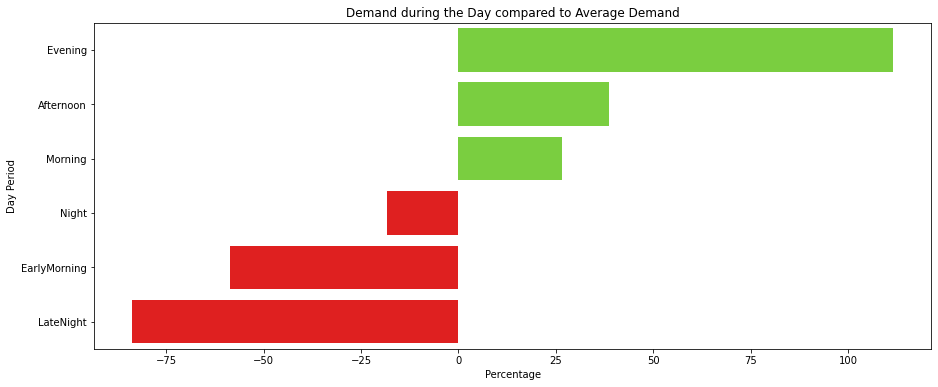

In [405]:
plt.figure(figsize = (15,6))



y = DC['dayperiod'].tolist()
x = DC['surge_traffic%'].tolist()

#y = SWC['Season_Weather'].tolist()[::-1]
#x = SWC['avg_traffic'].tolist()[::-1]

colorPalette = []
for i in x:
    if i > 0:
        colorPalette.append('#76E628')
    else:
        colorPalette.append('r')
        

sns.barplot(x, y, palette=colorPalette)

plt.ylabel("Day Period")
plt.xlabel("Percentage")
plt.title("Demand during the Day compared to Average Demand")
plt.savefig('DDAD.png',transparent=True)
plt.show()

    - Evening time (5pm to 8pm) sees the above average demand in the customer count than the average demand, at 111%.
    
    - Customer demand slumps after 8pm until 8 am, which is on expected lines.

In [201]:
SDC = yu.groupby(['seasonDesc','dayperiod'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
SDC['surge_traffic%'] = SDC['count'].apply(lambda x:round((x - yu['count'].mean())*100/yu['count'].mean(),2))
SDC['Season_Dayperiod'] = SDC['seasonDesc'] + ' & ' + SDC['dayperiod']
SDC = SDC[['Season_Dayperiod','count','surge_traffic%']]
SDC

,Season_Dayperiod,count,surge_traffic%
2,Fall & Evening,505.99,164.12
14,Summer & Evening,470.60,145.65
20,Winter & Evening,403.98,110.87
0,Fall & Afternoon,312.81,63.28
12,Summer & Afternoon,298.51,55.82
18,Winter & Afternoon,288.57,50.63
4,Fall & Morning,282.41,47.41
16,Summer & Morning,265.57,38.62
22,Winter & Morning,263.45,37.52
8,Spring & Evening,239.53,25.03


C:\Users\Vineet Pandya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


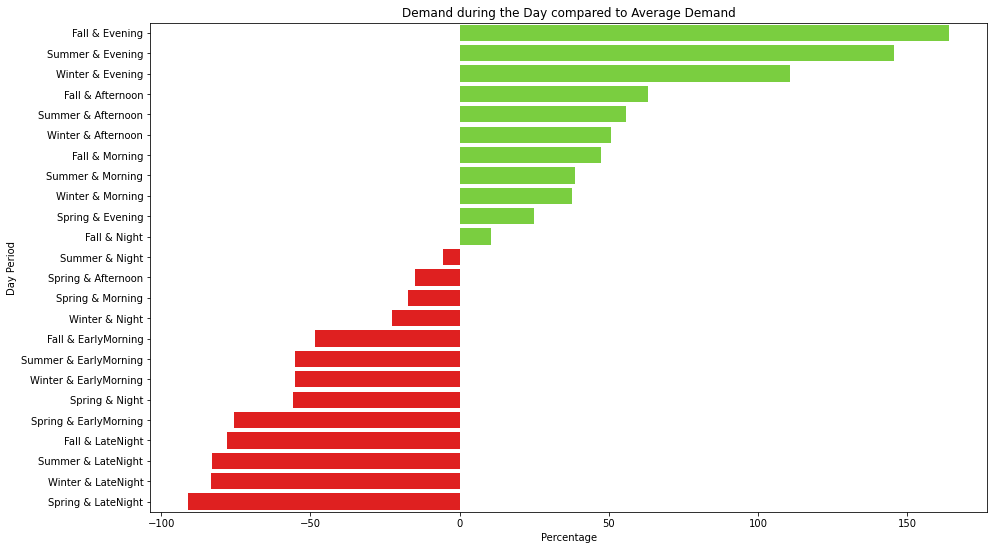

In [406]:
plt.figure(figsize = (15,9))

y = SDC['Season_Dayperiod'].tolist()
x = SDC['surge_traffic%'].tolist()

#y = SWC['Season_Weather'].tolist()[::-1]
#x = SWC['avg_traffic'].tolist()[::-1]

colorPalette = []
for i in x:
    if i > 0:
        colorPalette.append('#76E628')
    else:
        colorPalette.append('r')

sns.barplot(x, y, palette=colorPalette)

plt.ylabel("Day Period")
plt.xlabel("Percentage")
plt.title("Demand during the Day compared to Average Demand")
plt.savefig('DDAD_S.png',transparent=True)
plt.show()

    - Evening time sees the surge in demand in all the seasons than the average demand, followed by Afternoon time. Fall & Evening sees the highest jump with 164%, followed by Summer evening and Winter evening at 145% and 111% respectively
    
    - The only time afternoon time sees a slump is during Spring season.
    
    - Summer and winter mornings (8am to 12 noon) are also very unpopular for Yulu Bikes.
    
    - Jan, Feb and Mar sees the highest dip in customer demand on the same parameter, with demand dropping more than 50% in Jan.

In [123]:
yu.head(2)

,date,time,year,month,day,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,...,temp,atemp,windspeed,humidity,casual,registered,count,casual%,registered%,traffic
0,2011-01-01,00:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.84,14.395,0.0,81,3,13,16,18.75,81.25,Normal
1,2011-01-01,01:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,8,32,40,20.00,80.00,Normal


In [232]:
WDC = yu.groupby(['workingdayDesc','dayperiod'])['count'].mean().reset_index().sort_values(by = 'count', ascending = False).round(2)
WDCW = WDC[WDC['workingdayDesc'] == 'Working']
WDCN = WDC[WDC['workingdayDesc'] == 'Not Working']

WDCW = WDCW.rename(columns = {'count':'Working'})
WDCN = WDCN.rename(columns = {'count':'NotWorking'})

WDC = pd.merge(WDCW, WDCN, on = ['dayperiod'], how = 'inner').drop(['workingdayDesc_x','workingdayDesc_y'],axis=1)
WDC

,dayperiod,Working,NotWorking
0,Evening,458.31,291.24
1,Morning,253.21,219.84
2,Afternoon,213.59,377.40
3,Night,165.39,136.63
4,EarlyMorning,106.85,21.36
5,LateNight,16.75,61.51


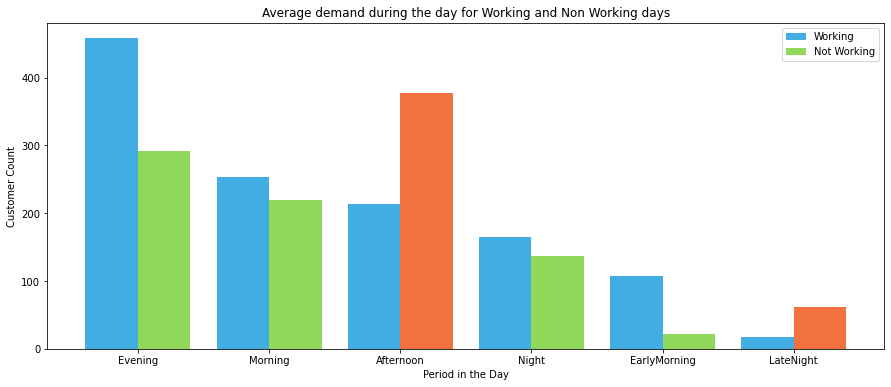

In [407]:
plt.figure(figsize = (15,6))

X = WDC2['dayperiod'].tolist()
Y = WDC2['Working'].tolist()
Z = WDC2['NotWorking'].tolist()

X_axis = np.arange(len(X))
  
colW = ['#41ADE3','#41ADE3','#41ADE3','#41ADE3','#41ADE3','#41ADE3']   
colN = ['#90D85A','#90D85A','#F3713D','#90D85A','#90D85A','#F3713D']   
    
plt.bar(X_axis - 0.2, Y, 0.4,color =colW, label = 'Working')
plt.bar(X_axis + 0.2, Z, 0.4,color =colN, label = 'Not Working')
  
plt.xticks(X_axis, X)
plt.xlabel("Period in the Day")
plt.ylabel("Customer Count")
plt.title("Average demand during the day for Working and Non Working days")
plt.savefig('ADDW.png',transparent=True)
plt.legend()
plt.show()

    - The general trend is the expected one i.e. Evening, Morning and Afternoon are the day period with highest demand in Yulu Bikes, with late night hours and early morning hours is the time with least demand, with working days have higher demand than  non working days.
    
    - However, an interesting insight is the fact that the demand during afternoon hours is much higher on a holiday than a working day. Also, there is also a higher demand on a holiday for Yulu Bikes during late night hours compared to the working days.
    
    

### Quarterly and Yearly Trends :

In [236]:
yu.head(2)

,date,time,year,month,day,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,...,temp,atemp,windspeed,humidity,casual,registered,count,casual%,registered%,traffic
0,2011-01-01,00:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.84,14.395,0.0,81,3,13,16,18.75,81.25,Normal
1,2011-01-01,01:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,8,32,40,20.00,80.00,Normal


In [237]:
def quarter(x):
    if x in ('Jan','Feb','Mar'):
        return 'Q4'
    elif x in ('Apr','May','Jun'):
        return 'Q1'
    elif x in ('Jul','Aug','Sep'):
        return 'Q2'
    elif x in ('Oct','Nov','Dec'):
        return 'Q3'

In [239]:
yu2 = yu[['seasonDesc','date','year','month','temp','humidity','windspeed','count']]
yu2.index = yu['date']
yu2['quarter'] = yu2['month'].apply(quarter)
yu2.head()

<ipython-input-239-6488e825f14b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yu2['quarter'] = yu2['month'].apply(quarter)


,seasonDesc,date,year,month,temp,humidity,windspeed,count,quarter
date,,,,,,,,,
2011-01-01,Spring,2011-01-01,2011,Jan,9.84,81,0.0,16,Q4
2011-01-01,Spring,2011-01-01,2011,Jan,9.02,80,0.0,40,Q4
2011-01-01,Spring,2011-01-01,2011,Jan,9.02,80,0.0,32,Q4
2011-01-01,Spring,2011-01-01,2011,Jan,9.84,75,0.0,13,Q4
2011-01-01,Spring,2011-01-01,2011,Jan,9.84,75,0.0,1,Q4


<AxesSubplot:xlabel='date'>

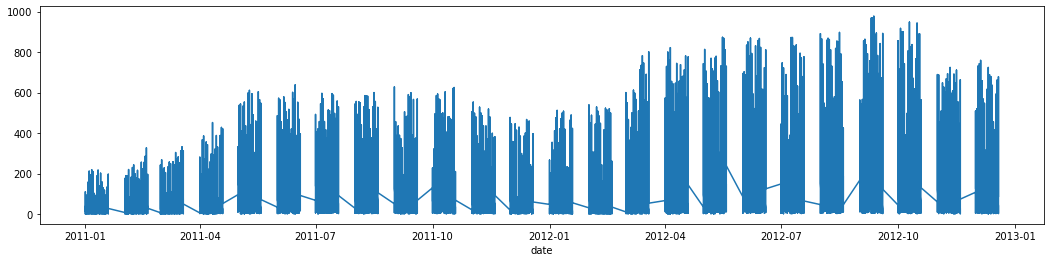

In [242]:
fig = plt.figure(figsize =(18, 4))
yu2['count'].plot()

<AxesSubplot:xlabel='date'>

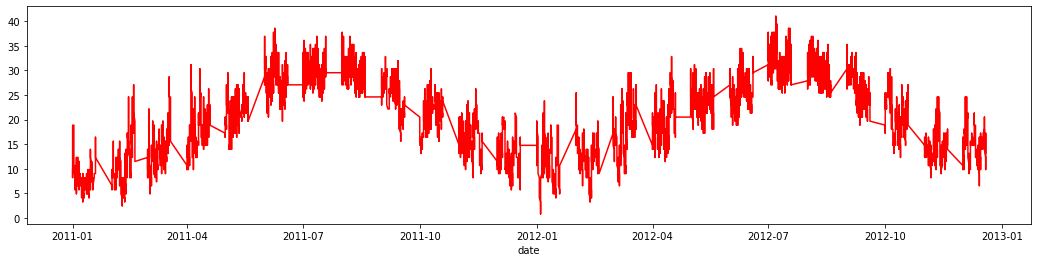

In [243]:
fig = plt.figure(figsize =(18, 4))
yu2['temp'].plot(color = 'r')

<AxesSubplot:xlabel='date'>

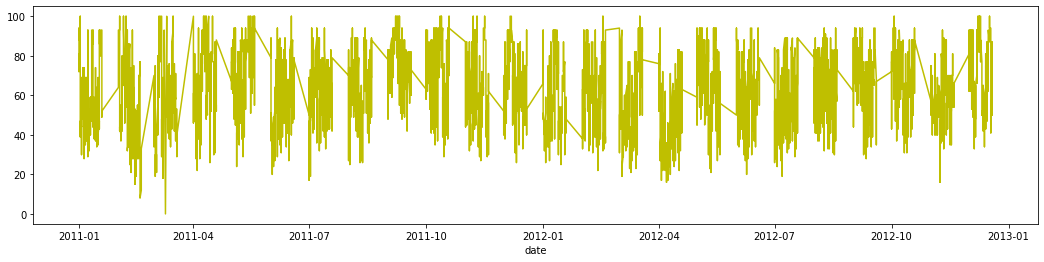

In [244]:
fig = plt.figure(figsize =(18, 4))
yu2['humidity'].plot(color = 'y')

<AxesSubplot:xlabel='date'>

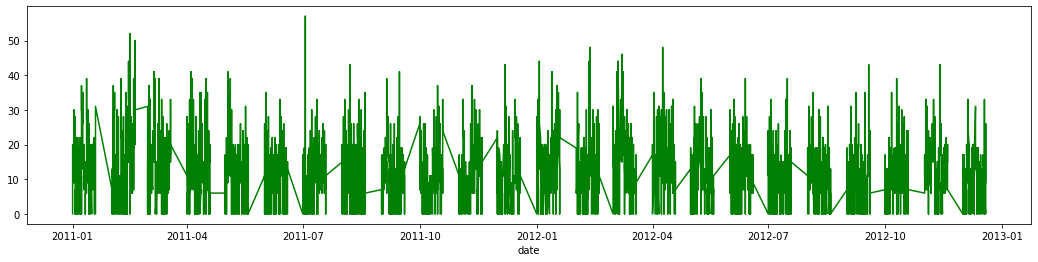

In [245]:
fig = plt.figure(figsize =(18, 4))
yu2['windspeed'].plot(color = 'g')

In [247]:
yu2['year'].value_counts()

2012    5463
2011    5422
Name: year, dtype: int64

In [248]:
yu2011 = yu2[yu2['year'] == 2011]
yu2012 = yu2[yu2['year'] == 2012]

In [250]:
Q_2011 = yu2011.groupby(['seasonDesc','quarter'])['count'].mean().reset_index().sort_values(by = 'quarter', ascending = True).round(2)
Q_2011

,seasonDesc,quarter,count
2,Summer,Q1,160.94
0,Fall,Q2,186.99
3,Winter,Q3,154.79
1,Spring,Q4,71.91


In [251]:
Q_2012 = yu2012.groupby(['seasonDesc','quarter'])['count'].mean().reset_index().sort_values(by = 'quarter', ascending = True).round(2)
Q_2012

,seasonDesc,quarter,count
2,Summer,Q1,269.60
0,Fall,Q2,281.74
3,Winter,Q3,243.19
1,Spring,Q4,159.47


In [252]:
Q_2011['c2'] = [np.nan] + Q_2011.iloc[:3,:]['count'].tolist()
Q_2011['QoQ%'] = (Q_2011['count'] - Q_2011['c2'])*100/Q_2011['count']
Q_2011['QoQ%'] = Q_2011['QoQ%'].fillna(0).round()
Q_2011 = Q_2011.drop('c2',axis=1)
Q_2011

,seasonDesc,quarter,count,QoQ%
2,Summer,Q1,160.94,0.0
0,Fall,Q2,186.99,14.0
3,Winter,Q3,154.79,-21.0
1,Spring,Q4,71.91,-115.0


In [253]:
Q_2012['c2'] = [np.nan] + Q_2012.iloc[:3,:]['count'].tolist()
Q_2012['QoQ%'] = (Q_2012['count'] - Q_2012['c2'])*100/Q_2011['count']
Q_2012['QoQ%'] = Q_2012['QoQ%'].fillna(0).round()
Q_2012 = Q_2012.drop('c2',axis=1)
Q_2012

,seasonDesc,quarter,count,QoQ%
2,Summer,Q1,269.60,0.0
0,Fall,Q2,281.74,6.0
3,Winter,Q3,243.19,-25.0
1,Spring,Q4,159.47,-116.0


In [254]:
TQ = yu2.groupby(['seasonDesc','quarter'])['temp'].agg(['min','mean','max']).reset_index().sort_values(by = 'quarter', ascending = True).round(2)
TQ

,seasonDesc,quarter,min,mean,max
2,Summer,Q1,9.84,22.82,38.54
0,Fall,Q2,15.58,28.79,41.00
3,Winter,Q3,5.74,16.65,30.34
1,Spring,Q4,0.82,12.53,29.52


In [255]:
Q = pd.merge(Q_2011,Q_2012, on = ['seasonDesc','quarter'], how = 'inner')

In [256]:
Q['YoY%'] = (Q['count_y'] - Q['count_x'])*100/Q['count_x']
Q['YoY%'] = Q['YoY%'].round(2)
Q

,seasonDesc,quarter,count_x,QoQ%_x,count_y,QoQ%_y,YoY%
0,Summer,Q1,160.94,0.0,269.60,0.0,67.52
1,Fall,Q2,186.99,14.0,281.74,6.0,50.67
2,Winter,Q3,154.79,-21.0,243.19,-25.0,57.11
3,Spring,Q4,71.91,-115.0,159.47,-116.0,121.76


In [257]:
Q = pd.merge(Q,TQ,on = ['seasonDesc','quarter'],how = 'inner')
Q = pd.merge(Q,yu2.groupby(['quarter'])['humidity'].mean().reset_index().round(2),on = ['quarter'],how = 'inner')
Q = pd.merge(Q,yu2.groupby(['quarter'])['windspeed'].mean().reset_index().round(2),on = ['quarter'],how = 'inner')

In [258]:
Q = Q.rename(columns = {'count_x':'Avg2011','count_y':'Avg2012','QoQ%_x':'QoQ%_2011','QoQ%_y':'QoQ%_2012',
                        'mean':'AvgTemp','min':'minTemp','max':'MaxTemp'})
Q

,seasonDesc,quarter,Avg2011,QoQ%_2011,Avg2012,QoQ%_2012,YoY%,minTemp,AvgTemp,MaxTemp,humidity,windspeed
0,Summer,Q1,160.94,0.0,269.60,0.0,67.52,9.84,22.82,38.54,60.85,13.41
1,Fall,Q2,186.99,14.0,281.74,6.0,50.67,15.58,28.79,41.00,64.12,11.51
2,Winter,Q3,154.79,-21.0,243.19,-25.0,57.11,5.74,16.65,30.34,66.17,11.68
3,Spring,Q4,71.91,-115.0,159.47,-116.0,121.76,0.82,12.53,29.52,56.29,14.64


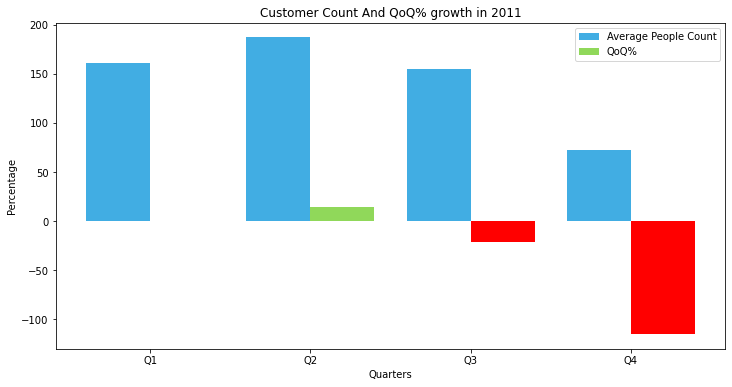

In [409]:
plt.figure(figsize = (12,6))

X = Q['quarter'].tolist()
Y = Q['Avg2011'].tolist()
Z = Q['QoQ%_2011'].tolist()

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, color ='#41ADE3', label = 'Average People Count')
plt.bar(X_axis + 0.2, Z, 0.4, color =['#90D85A','#90D85A','red','red'], label = 'QoQ%')
  
plt.xticks(X_axis, X)
plt.xlabel("Quarters")
plt.ylabel("Percentage")
plt.title("Customer Count And QoQ% growth in 2011")
plt.savefig('QoQ_2011.png',transparent=True)
plt.legend()
plt.show()

    - In 2011, there is a slight increase of 14% in Q2, and we can see a decrease of 21% in Q3 and but the customer demand dropped very drastically in Q4, with demand dropping by 115%.

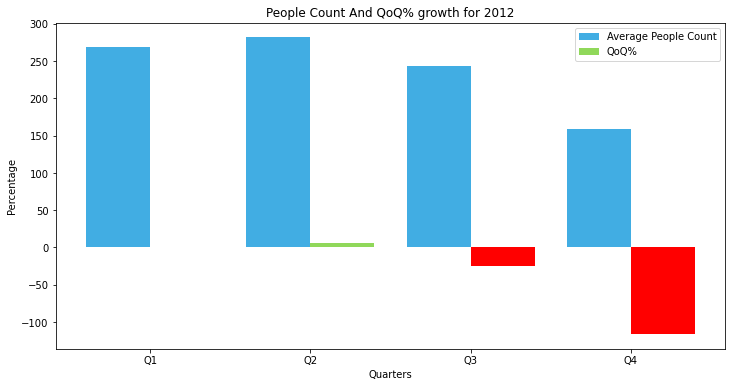

In [410]:
plt.figure(figsize = (12,6))

X = Q['quarter'].tolist()
Y = Q['Avg2012'].tolist()
Z = Q['QoQ%_2012'].tolist()

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4,color ='#41ADE3', label = 'Average People Count')
plt.bar(X_axis + 0.2, Z, 0.4,color =['#90D85A','#90D85A','red','red'], label = 'QoQ%')
  
plt.xticks(X_axis, X)
plt.xlabel("Quarters")
plt.ylabel("Percentage")
plt.title("People Count And QoQ% growth for 2012")
plt.savefig('QoQ_2012.png',transparent=True)
plt.legend()
plt.show()

    - In 2012, we see the exact same trend as we saw in 2011!
    
    - There is again a slight increase of 6% in Q2, and we can see a decrease of 25% in Q3 and but the customer demand dropped very drastically in Q4, with demand dropping by 116%.

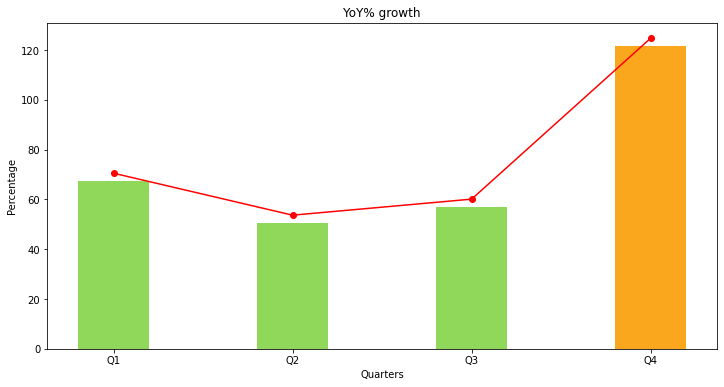

In [411]:
plt.figure(figsize = (12,6))
#plt.style.use('seaborn-dark')
#plt.rcdefaults()

x = Q['quarter'].tolist()
y = Q['YoY%'].tolist()

plt.bar(x = x, height = y, width = 0.4,color =['#90D85A','#90D85A','#90D85A','#FAA71D'])   #F8654B
plt.xticks(x,('Q1','Q2','Q3','Q4'))

#y2 = Q['YoY%'].tolist()

y3 = [i+3 for i in y]

plt.plot(x,y3, color = 'r')
plt.scatter(x,y3,color ='r')


plt.xlabel("Quarters")
plt.ylabel("Percentage")
plt.title("YoY% growth")
plt.savefig('YoY.png',transparent=True)
plt.show()

    - Analyzing the YoY Growth, things look very optimistic for Yulu Bikes. All the quarters have seen a positive growth in the year 2012, with 68% in Q1, 51% in Q2, 57% in Q3.
    
    - Although Q4 is the worst performing quarter in terms of demand for each year, but the demand is actually seen to be increasing very very drastically in Q4 with a whooping 121% jump in the demand.

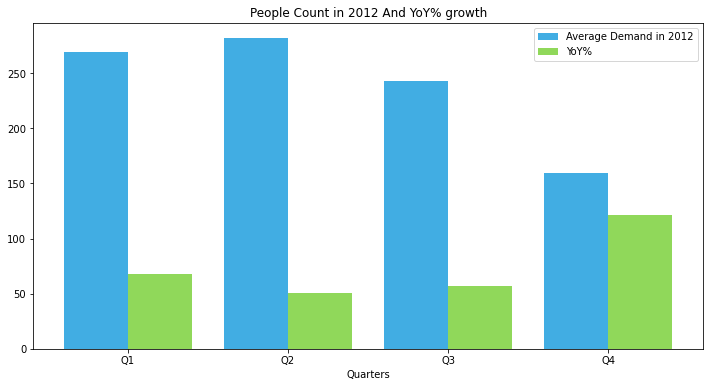

In [295]:
plt.figure(figsize = (12,6))

X = Q['quarter'].tolist()
Y = Q['Avg2012'].tolist()
Z = Q['YoY%'].tolist()

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4,color ='#41ADE3', label = 'Average Demand in 2012')
plt.bar(X_axis + 0.2, Z, 0.4,color =['#90D85A','#90D85A','#90D85A','#90D85A'], label = 'YoY%')

#y3 = [i+3 for i in Z]
#plt.plot(x,y3, color = 'r')
#plt.scatter(x,y3,color ='r')
  
plt.xticks(X_axis, X)
plt.xlabel("Quarters")
plt.title("People Count in 2012 And YoY% growth")
#plt.savefig('YoY2.png',transparent=True)
plt.legend()
plt.show()

## Effect of Temperature, Windspeed and Humidity over the customer demand :

In [296]:
Q

,seasonDesc,quarter,Avg2011,QoQ%_2011,Avg2012,QoQ%_2012,YoY%,minTemp,AvgTemp,MaxTemp,humidity,windspeed
0,Summer,Q1,160.94,0.0,269.60,0.0,67.52,9.84,22.82,38.54,60.85,13.41
1,Fall,Q2,186.99,14.0,281.74,6.0,50.67,15.58,28.79,41.00,64.12,11.51
2,Winter,Q3,154.79,-21.0,243.19,-25.0,57.11,5.74,16.65,30.34,66.17,11.68
3,Spring,Q4,71.91,-115.0,159.47,-116.0,121.76,0.82,12.53,29.52,56.29,14.64


In [300]:
Q[['Avg2011','Avg2012','YoY%','AvgTemp','humidity','windspeed']]

,Avg2011,Avg2012,YoY%,AvgTemp,humidity,windspeed
0,160.94,269.60,67.52,22.82,60.85,13.41
1,186.99,281.74,50.67,28.79,64.12,11.51
2,154.79,243.19,57.11,16.65,66.17,11.68
3,71.91,159.47,121.76,12.53,56.29,14.64


###  Correlation between temperature and humidity with the customer demand : we need to transform the data to a standard form. Let's normalize the data to Zscore data :

In [299]:
import scipy.stats as stats

In [301]:
num_cols = ['Avg2011','Avg2012','YoY%','AvgTemp','humidity','windspeed']
zscores = stats.zscore(Q[num_cols])
zscores = pd.DataFrame(zscores)
zscores.columns = num_cols
zscores['quarter'] = Q['quarter'].tolist()
zscores['seasonDesc'] = Q['seasonDesc'].tolist()
zscores

,Avg2011,Avg2012,YoY%,AvgTemp,humidity,windspeed,quarter,seasonDesc
0,0.400512,0.651867,-0.240270,0.425308,-0.269920,0.464440,Q1,Summer
1,1.004207,0.906325,-0.840499,1.393503,0.606149,-1.006287,Q2,Fall
2,0.257990,0.098304,-0.611094,-0.575322,1.155366,-0.874695,Q3,Winter
3,-1.662709,-1.656496,1.691862,-1.243490,-1.491595,1.416542,Q4,Spring


In [305]:
zscores.corr().round(2).reset_index()[['index','Avg2011','Avg2012']][3:6]

,index,Avg2011,Avg2012
3,AvgTemp,0.87,0.89
4,humidity,0.82,0.74
5,windspeed,-0.85,-0.76


    - We can see a huge positive correlation between customer count and the average temperature (around 90%) as well as humidity (around 80%), which means temperature and humidity play a majore role in the Yulu Bike demand. 
    
    - We can also see a strong negative correlation between customer count and windspeed (around -80%), telling us that the count does depend on windspeed in a way that demand actually drops as the windspeed increases.

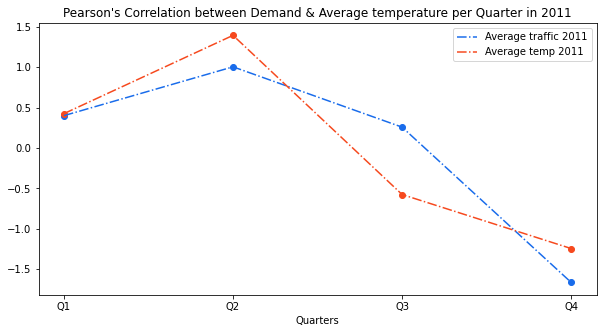

In [432]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2011'].tolist()
y2 = zscores['AvgTemp'].tolist()


plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average traffic 2011')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average temp 2011')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average temperature per Quarter in 2011")
plt.savefig('2011_temp.png',transparent=True)
plt.legend()
plt.show()

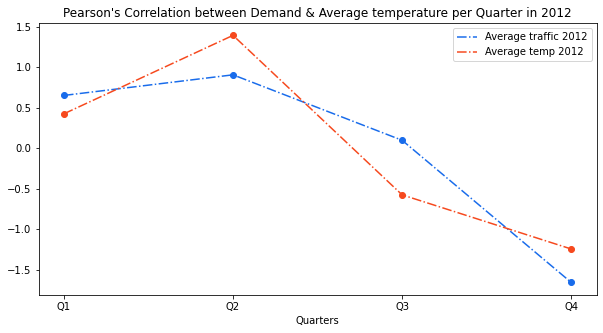

In [433]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2012'].tolist()
y2 = zscores['AvgTemp'].tolist()


plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average traffic 2012')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average temp 2012')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average temperature per Quarter in 2012")
plt.savefig('2012_temp.png',transparent=True)
plt.legend()
plt.show()

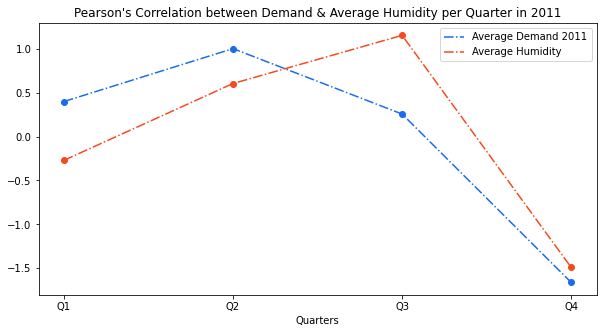

In [448]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2011'].tolist()
y2 = zscores['humidity'].tolist()


plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average Demand 2011')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average Humidity')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average Humidity per Quarter in 2011")
plt.savefig('2011_hum.png',transparent=True)
plt.legend()
plt.show()

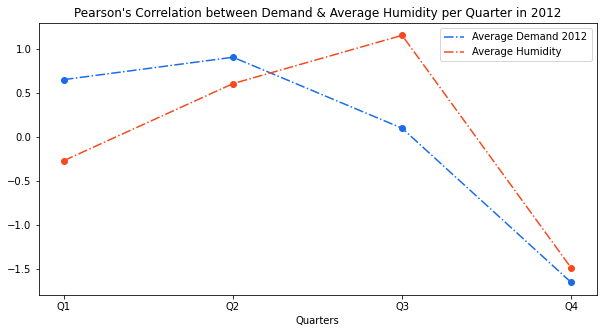

In [449]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2012'].tolist()
y2 = zscores['humidity'].tolist()


plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average Demand 2012')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average Humidity')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average Humidity per Quarter in 2012")
plt.savefig('2012_hum.png',transparent=True)
plt.legend()
plt.show()

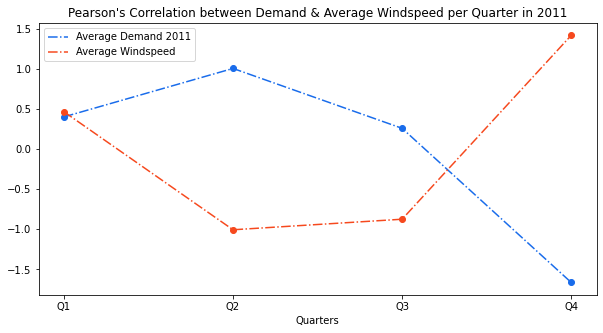

In [437]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2011'].tolist()
y2 = zscores['windspeed'].tolist()


plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average Demand 2011')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average Windspeed')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average Windspeed per Quarter in 2011")
plt.savefig('2011_wind.png',transparent=True)
plt.legend()
plt.show()

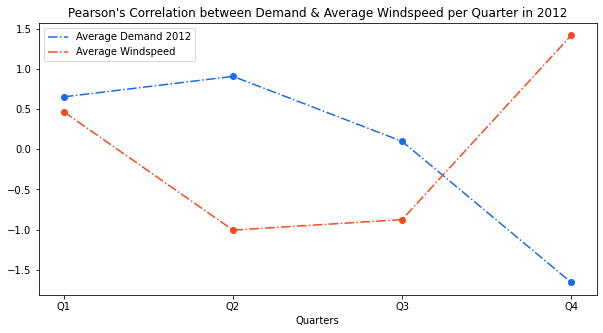

In [450]:
plt.figure(figsize = (10,5))

x = zscores['quarter'].tolist()
y = zscores['Avg2012'].tolist()
y2 = zscores['windspeed'].tolist()

plt.plot(x,y, color = '#196CEB',linestyle = '-.', label = 'Average Demand 2012')
plt.plot(x,y2, color = '#F6491E',linestyle = '-.',label = 'Average Windspeed')
plt.scatter(x,y, color = '#196CEB')
plt.scatter(x,y2, color = '#F6491E')

X_axis = np.arange(len(x))

plt.xticks(X_axis, x)
plt.xlabel("Quarters")
plt.title("Pearson's Correlation between Demand & Average Windspeed per Quarter in 2012")
plt.savefig('2012_wind.png',transparent=True)
plt.legend()
plt.show()

### Registered customers vs Casual Customers :

In [321]:
yu.head(3)

,date,time,year,month,day,dayperiod,weatherDesc,seasonDesc,holidayDesc,workingdayDesc,...,temp,atemp,windspeed,humidity,casual,registered,count,casual%,registered%,traffic
0,2011-01-01,00:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.84,14.395,0.0,81,3,13,16,18.75,81.25,Normal
1,2011-01-01,01:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,8,32,40,20.00,80.00,Normal
2,2011-01-01,02:00:00,2011,Jan,1,LateNight,Clear,Spring,Not Holiday,Not Working,...,9.02,13.635,0.0,80,5,27,32,15.62,84.38,Normal


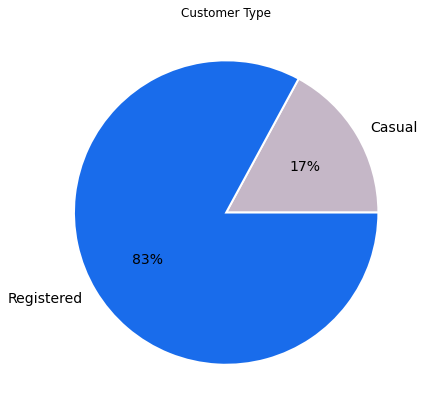

In [452]:
fig = plt.figure(figsize =(12, 7))
colors2 = ['#C5B7C7','#196CEB']
plt.pie([round(yu['casual%'].mean(),2),round(yu['registered%'].mean(),2)],labels=['Casual','Registered'],autopct='%.f%%',textprops={'fontsize': 14},wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors = colors2)
plt.title("Customer Type")
plt.savefig('Customer_type.png', transparent = True)
plt.show()

        - A great news for Yulu Bikes, 83% of the total customers are actually registered users and only 17% customers are casual.
        


In [346]:
WC = yu.groupby(['workingdayDesc'])['casual'].mean().round(2).reset_index()
WR = yu.groupby(['workingdayDesc'])['registered'].mean().round(2).reset_index()

CR = pd.merge(WC,WR, on = 'workingdayDesc', how = 'inner')
CR

,workingdayDesc,casual,registered
0,Not Working,59.31,129.20
1,Working,25.11,167.91


In [442]:
(59-25)*100/25

136.0

In [444]:
(129-168)*100/168

-23.214285714285715

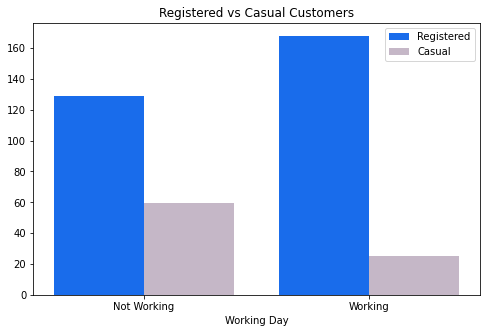

In [451]:
plt.figure(figsize = (8,5))

X = WR['workingdayDesc'].tolist()
Y = WR['registered'].tolist()
Z = WC['casual'].tolist()

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4,color =['#196CEB'], label = 'Registered') 
plt.bar(X_axis + 0.2, Z, 0.4,color =['#C5B7C7'], label = 'Casual')

  
plt.xticks(X_axis, X)
plt.xlabel("Working Day")
plt.title("Registered vs Casual Customers")
plt.savefig('Customer_type_ho.png', transparent = True)
plt.legend()
plt.show()

        - Out of the registered customers, an average of 168 customers use Yulu during the working days, more than non working days.
        
        - But, out of the casual customers, this pattern is reversed i.e. casual customers tend to use Yulu on a non working days more than the working days.

# Some Recommendations To The Leadership:

    - Overall, things look very optimistic for Yulu Bikes. The popularity of Yulu Bikes is on a rise per year.
    All the quarters have seen a positive YoY growth :
    
        Q1 : +68%
        Q2 : +51%
        Q3 : +57%
        Q4 : +122%
        

    (1) SEASONS :
    
    - Yulu sees the highest demand during Fall and Summer seasons, while demand drops during Spring. 
    
    
    YULU : should focus on strengthening the demands in Fall and Summer, while need to focus on creating marketing campaigns during Spring season.
    
    
    
    
    (2) WEATHER :
    
    - Majority of the customers prefer a clear weather, with cloudy weather being the second most preferred weather.
    
    
    YULU : should experiment with surge pricing on a cloudy day.
    
    
    
    
    (3) SEASON + WEATHER :
    
    - The top most conditions with the highest demand for Yulu Bikes are during Clear weather during Fall, Summer and Winter, along with Cloudy consitions during Fall and Winter.
    
    
    - YULU : should experiment with surge pricing for conditions such as:
    
        Fall & Clear
        Summer & Clear
        Winter & Clear
        Fall & Cloudy
        Winter & Cloudy
        
        
        
    
    (4) HIGHEST PROBABILITY OF A CUSTOMER VISIT:
    
    - Unexpectedly, the highest probability for the customers to use a Yulu Bike is during Fall with Light Rains, with a staggering 80% !! followed by Light Rains in Winter and Summer with 60% and 55% respectively.
    
    - Yulu should experiment with surge pricing during Light Rains in any of the 4 weathers i.e. throughout the year.
    
    
    
    
    (5) WORKING DAY VS HOLIDAY
    
    - We do not see any significant difference of working/non working days for any season as such. Fall and Summer are most preferred seasons by the customers and Clear skies are most preferred by the customers.
    
    - However, on a holiday, Yulu is more in demand by customers that are not registered. 
    
    
    YULU : should focus on creating loyalty campaigns on holidays, to convert the casual customers into registered customers.
    YULU : on a holiday, should try targeted ad campaigns during 12noon to 5pm as well as during 12am to 4 am time period.
    
    
    
    (6) TEMPERATURE :
    
    - Temperature has very strong correlation with Yulu customer count i.e. around 90%.
    
    
    Temp where demand increases : around the average temp of 26°C, with the range of 10°C to 41°C
    
    Temp where demand decreases : as the average temp drops below 17°C, with the range of 6°C to 30°C
    
    Temp where demand perishes  : as the average temp drops below 12°C, with the range of 0°C to 29°C
    
    
    - Temperature with the highest growth YoY (122%) : average temp of 12°C, with the range of 0°C to 29°C
    
    
    YULU : should look to increase their operations in the cities where mostly the temperature range lies between 17°C and  41°C.
    
    YULU : should also start new marketing ventures during the colder seasons where the temp range is 0°C to 12°C, which is the temp range with fastest growing customer demand.
    
    
    
    
    
    (7) HUMIDITY AND WINDSPEED :
    
    - Humidity has very strong positive correlation with Yulu customer count i.e. around 80%.
    - Windspeed has very strong negative correlation with Yulu customer count i.e. around -80%.
    
    YULU : should target cities and seasons where humidity is in the range of 60% to 70%.
    YULU : should target cities and weather where windspeed is on a lower side, usually less than 12 Km/h.
    
    
    
    
    (8) SPIKES DURING THE DAY :
    
        - Evening, Morning and Afternoon are the day period with highest demand in Yulu Bikes, but 8pm to 12 am is the time where demand decreases.
        
        - Working days have higher demand than non working days.
    
        - The demand during afternoon & late night hours is much higher on a holiday than on a working day. 
    
        - Evening time sees the surge in demand in all the seasons than the average demand, followed by Afternoon time. Fall & Evening sees the highest jump with 164%, followed by Summer evening and Winter evening at 145% and 111% respectively
    

    YULU : should experiment with surge pricing during 5pm to 8pm time period during the day, throughout the year.
    YULU : on a holiday, should try targeted ad campaigns during 12noon to 5pm as well as during 12am to 4 am time period.
    YULU : should try lucrative offers during night time (8pm to 12am) as this is the time which has a very good scope of growth.
    
    

## END